# ML-Prediction ANN


In [14]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns

from collections import Counter
# Tansorflow for building an Artificial neural network with multiple predictor variables
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
import sys
sys.path.insert(0, os.path.abspath('../utils/')) #point this to the where util is relatively to your working directory
from util import *

data_dir = get_path_to_data_dir()
plot_dir = get_path_to_plot_dir()

print(data_dir) #check that it's correct

/Users/admin/Documents/Jobs/Datatonic/datatonic-challenge/data/


In [18]:
#loading the data from the pickled file
movie_data = pd.read_pickle(data_dir + 'pre-processed/movie_encoded_only_numeric.pkl')

In [19]:
movie_data

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
0,105000000,64682,351040419,143.0,7.3,3769,130,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,150000000,9543,335154643,116.0,6.2,2317,139,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,140000000,5174,258022233,91.0,6.1,783,220,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,145000000,1735,401128639,112.0,5.2,1387,183,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,15000000,315011,77000000,120.0,6.5,143,211,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,14000000,33693,76901,85.0,6.3,8,263,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3070,12000,692,6000000,93.0,6.2,110,72,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3071,20000,36095,99000,111.0,7.4,63,310,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3072,7000,14337,424760,77.0,6.9,658,282,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Normalise the data
The initial data.describe() for `'budget', 'revenue', 'runtime', 'release_date'` shows the extreme jump from the 75% confidence interval to the maximum value.  Even with the removal of the z values exceeding 3 stds, budget requires transformation.

In [20]:
movie_data.describe()

,budget,id,revenue,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,...,Yasiin Bey,Yul Vazquez,Zac Efron,Zach Galifianakis,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel
count,3.074000e+03,3074.000000,3.074000e+03,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,...,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000
mean,3.259586e+07,41792.111256,8.242613e+07,108.210800,6.263598,677.125895,196.303188,0.729993,0.241054,0.559206,...,0.002602,0.002277,0.003578,0.003904,0.001952,0.000325,0.005205,0.002602,0.004229,0.005205
std,3.113976e+07,68580.591865,9.774348e+07,17.540594,0.845238,777.354549,103.155056,0.444035,0.427793,0.496563,...,0.050956,0.047673,0.059722,0.062368,0.044144,0.018036,0.071969,0.050956,0.064904,0.071969
min,1.000000e+00,5.000000,5.000000e+00,41.000000,2.600000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+07,6197.750000,1.372544e+07,95.000000,5.800000,149.000000,106.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.200000e+07,11459.500000,4.431807e+07,105.000000,6.300000,389.000000,210.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000e+07,43606.250000,1.152580e+08,119.000000,6.900000,893.750000,278.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.500000e+08,321258.000000,5.637493e+08,174.000000,8.500000,4391.000000,365.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Normalising function

In [64]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [65]:
movie_data_x = normalize(movie_data['budget'])
movie_data_x.describe()

count    3074.000000
mean        0.217306
std         0.207598
min         0.000000
25%         0.066667
50%         0.146667
75%         0.313333
max         1.000000
Name: budget, dtype: float64

After normalization, the data is just as skewed as before. If the goal is simply to convert the data to points between 0 and 1, normalization is the way to go. Instead, I am going to use normalization in conjunction with other functions.

##### Sigmoid Function

In [66]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [67]:
movie_data_x = sigmoid(movie_data['budget'])
movie_data_x.describe()

count    3074.000000
mean        0.999906
std         0.004861
min         0.731059
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: budget, dtype: float64

Here, the 25, 50th and 75th percentile is exactly the same as the 100th percentile, but in the original data, the 75th percentile more than  away from the 100th percentile, not remotely close to other quartiles. In this case, the data has been distorted.

##### Log function

In [68]:
movie_data_x = np.log(movie_data['budget'] + 1)
movie_data_x.describe()

count    3074.000000
mean       16.662791
std         1.608197
min         0.693147
25%        16.118096
50%        16.906553
75%        17.665658
max        18.826146
Name: budget, dtype: float64

The `log()` function also distorts the data, as the 25% LQ range from 1 to 16 whereas the maximum transformed value of `budget` is 18.

#### Cubic transformation

In [69]:
movie_data_x = movie_data.budget**(1/3)
movie_data_x.describe()

count    3074.000000
mean      284.953754
std       105.227806
min         1.000000
25%       215.443469
50%       280.203933
75%       360.882608
max       531.329285
Name: budget, dtype: float64

The data looks good here. The new range is from 1 to 531, and the quartiles are reflective of the original data. Now I will normalise these results.

In [70]:
def feature_scaling(column, df):
    cube_root = df[column]**(1/3)
    cube_norm = normalize(cube_root)
    df[column+"_cube_norm"] = cube_norm
    
    return df

columns_to_scale = ['budget', 'revenue', 'runtime', 'release_date']
for column in columns_to_scale:
    movie_data = feature_scaling(column, movie_data)
movie_data.drop(columns='revenue', axis=1)

,budget,id,runtime,vote_average,vote_count,release_date,lead_male,lead_female,lead2_male,lead2_female,...,Zachary Woodlee,Zak Penn,Zeljko Ivanek,Zhang Ziyi,Zoe Saldana,Zooey Deschanel,budget_cube_norm,revenue_cube_norm,runtime_cube_norm,release_date_cube_norm
0,105000000,64682,143.0,7.3,3769,130,1,0,1,0,...,0,0,0,0,0,0,0.887693,0.853630,0.834416,0.661474
1,150000000,9543,116.0,6.2,2317,139,1,0,0,1,...,0,0,0,0,0,0,1.000000,0.840522,0.669359,0.680071
2,140000000,5174,91.0,6.1,783,220,1,0,1,0,...,0,0,0,0,0,0,0.977222,0.770174,0.491777,0.819451
3,145000000,1735,112.0,5.2,1387,183,1,0,1,0,...,0,0,0,0,0,0,0.988742,0.892533,0.642789,0.760979
4,15000000,315011,120.0,6.5,143,211,1,0,1,0,...,0,0,0,0,0,0,0.463148,0.513987,0.695324,0.805871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,14000000,33693,85.0,6.3,8,263,0,0,0,0,...,0,0,0,0,0,0,0.452576,0.049510,0.444408,0.879671
3070,12000,692,93.0,6.2,110,72,1,0,0,0,...,0,0,0,0,0,0,0.041284,0.218348,0.507103,0.514135
3071,20000,36095,111.0,7.4,63,310,1,0,1,0,...,0,0,0,0,0,0,0.049298,0.054041,0.636048,0.938393
3072,7000,14337,77.0,6.9,658,282,1,0,1,0,...,0,0,0,0,0,0,0.034185,0.089110,0.377645,0.904191


Here if we scroll to the left then we can see that these cobe norm variables have been produced.

 This looks very reasonable. The cube function plus normalization is an excellent way to transform skewed data if the results can still be skewed.

### Using budget,  runtime, vote_average, vote_count and release_date to predict revenue
In a regression problem, we aim to predict the output of a continuous value, in this case, the revenue generated by movies.

In [73]:
from sklearn.model_selection import train_test_split as sk_train_test_split

movie_data_train, movie_data_test = sk_train_test_split(movie_data)

In [72]:
# Saving the x, y for model 1
movie_data_y = movie_data.iloc[:, [2]]
movie_data_x_1  = movie_data[["revenue_cube_norm", "budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]]

#### Inspect the data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

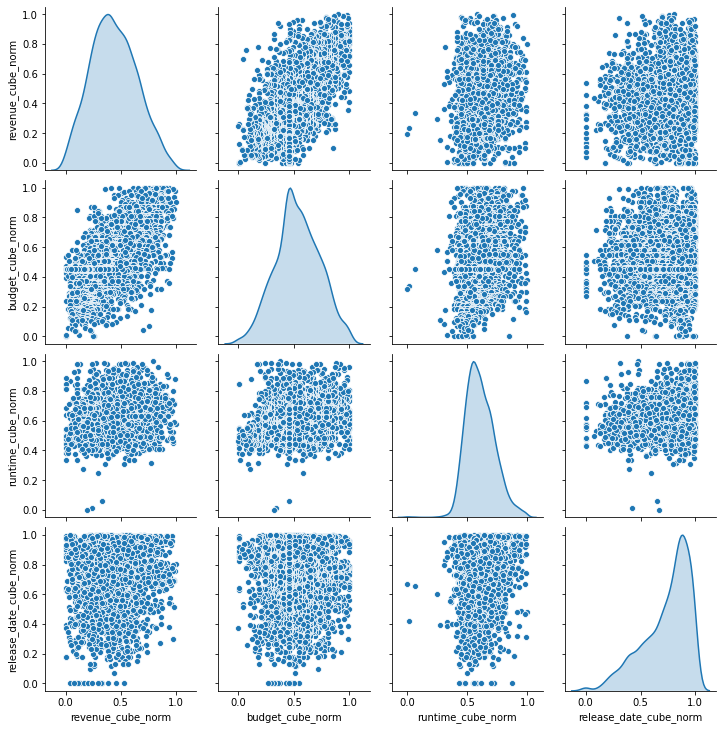

In [74]:
sns_plot_1 = sns.pairplot(movie_data[["revenue_cube_norm", "budget_cube_norm", "runtime_cube_norm", "release_date_cube_norm"]], diag_kind="kde")
sns_plot_1.savefig(plot_dir+"sns_plot_revenue_budget_runtime_release_date_revenue.png")

In [75]:
def y_data_description(y):
    y_stats = y.describe()
    y_stats = y_stats.transpose()
    return y_stats

In [76]:
movie_data_y_desc = y_data_description(movie_data_y)
movie_data_y_desc

,count,mean,std,min,25%,50%,75%,max
revenue,3074.0,8.242613e+07,9.774348e+07,5.0,13725438.75,44318065.5,1.152580e+08,563749323.0


#### Split features from labels
Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [79]:
movie_data_train_labels = movie_data_train.pop('revenue_cube_norm')
movie_data_test_labels = movie_data_test.pop('revenue_cube_norm')

In [80]:
def x_data_description(x):
    x_stats = x.describe()
    x_stats = x_stats.transpose()
    return x_stats

In [81]:
movie_data_x_desc = x_data_description(movie_data_x_1)
movie_data_x_desc

,count,mean,std,min,25%,50%,75%,max
revenue_cube_norm,3074.0,0.441656,0.208755,0.0,0.288359,0.427197,0.588256,1.0
budget_cube_norm,3074.0,0.535429,0.198420,0.0,0.404359,0.526473,0.678602,1.0
runtime_cube_norm,3074.0,0.610748,0.118027,0.0,0.522210,0.594727,0.688888,1.0
release_date_cube_norm,3074.0,0.739192,0.211543,0.0,0.607269,0.804338,0.899122,1.0


In [84]:
def norm(x):
    return (x - movie_data_x_desc['mean']) / movie_data_x_desc['std']

In [85]:
normed_train_data = norm(movie_data_x_1)
normed_test_data = norm(movie_data_x_1)

In [86]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model